<a href="https://colab.research.google.com/github/Favdesta/Marketing-A-B-Testing-Analysis/blob/main/A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read the data
df = pd.read_csv('/content/marketing_AB.csv')

In [4]:
#Check first few observations
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
#Check if we have duplicates with respect to user id
df.duplicated(subset=['user id']).sum()

0

In [8]:
#Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [13]:
#Check if the categorical variables have appropriate number of levels
df_cat = df[[ 'test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [14]:
#Check if the categorical variables have appropriate levels
for i in df_cat.columns:
  print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Univariate Analysis

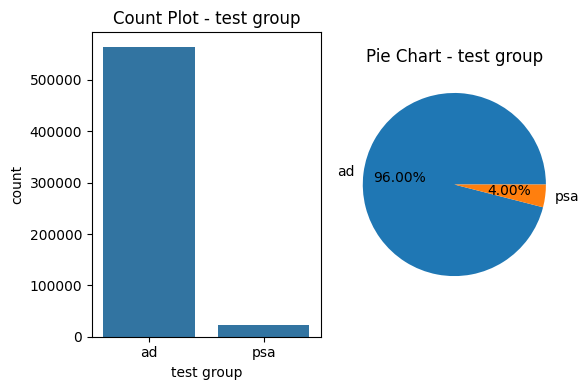

In [15]:
#Object variable
variable = 'test group'

plt.figure(figsize = (6,4))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()



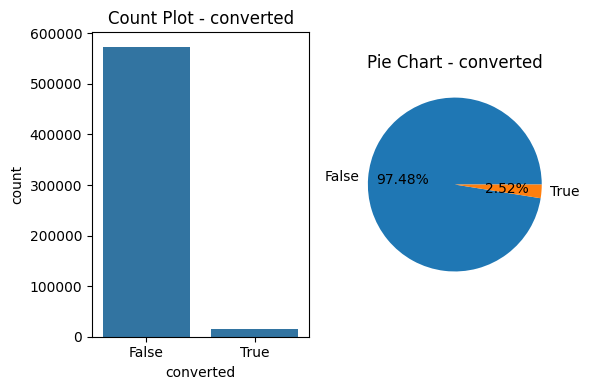

In [16]:
variable = 'converted'

plt.figure(figsize = (6,4))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

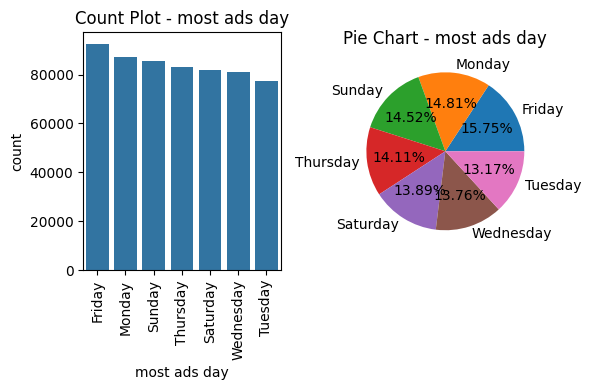

In [18]:
variable = 'most ads day'

plt.figure(figsize = (6,4))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat,
              order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

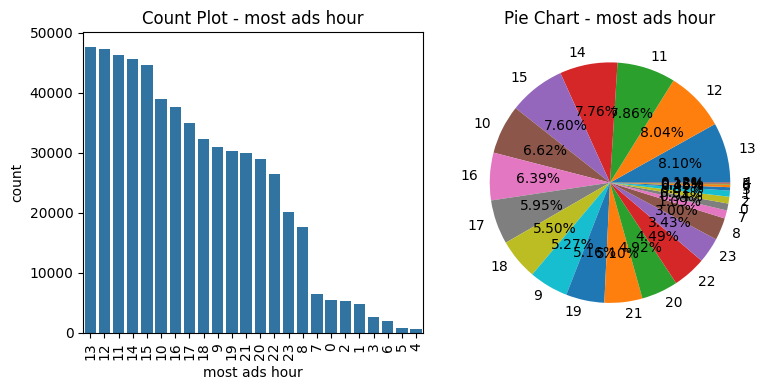

In [19]:
variable = 'most ads hour'

plt.figure(figsize = (8,4))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat,
              order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout
plt.tight_layout()
#Show the plots
plt.show()

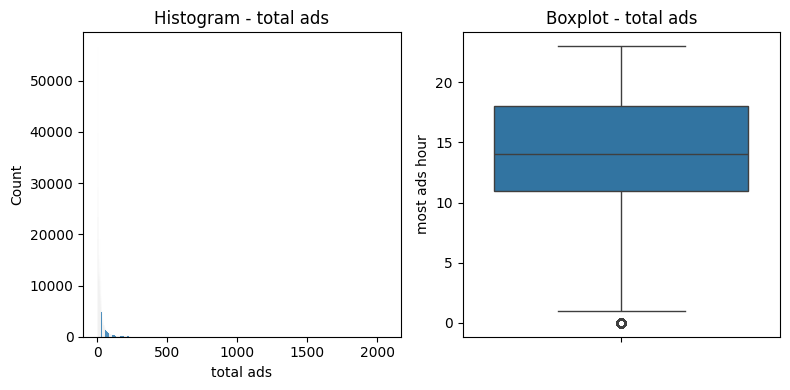

In [20]:
varible = 'total ads'

plt.figure(figsize = (8,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x = varible, data = df)
plt.title(f'Histogram - {varible}')

#BoxPlot
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df)
plt.title(f'Boxplot - {varible}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()

In [21]:
#Let's check the descriptive stats of this feature
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


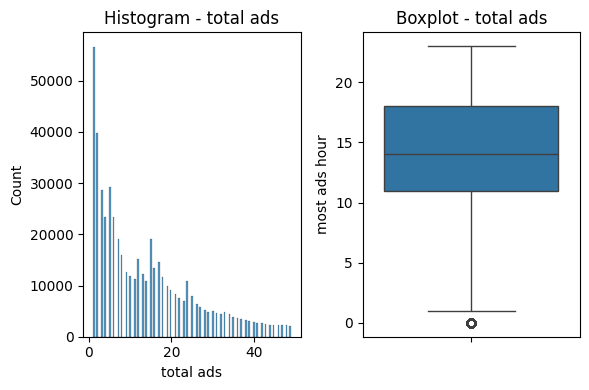

In [22]:
varible = 'total ads'

plt.figure(figsize = (6,4))

#Histogram
plt.subplot(1,2,1)

#Filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x = varible, data = df[df['total ads'] < 50])
plt.title(f'Histogram - {varible}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {varible}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()


Bivariate analysis

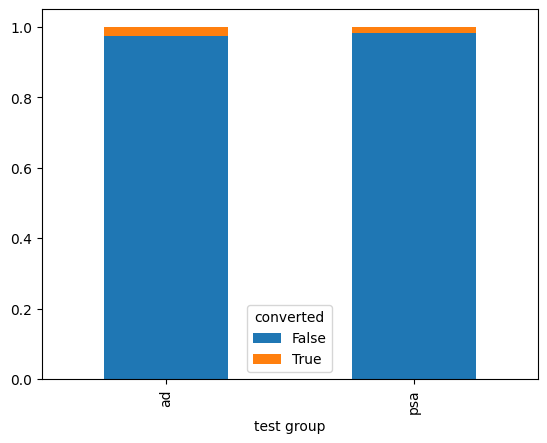

In [24]:
df.columns

ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051
converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575

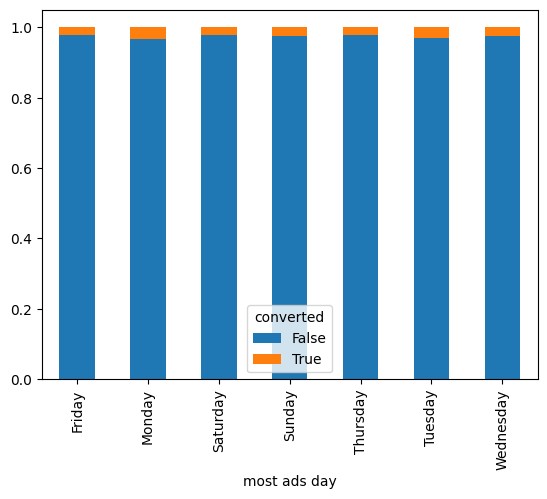

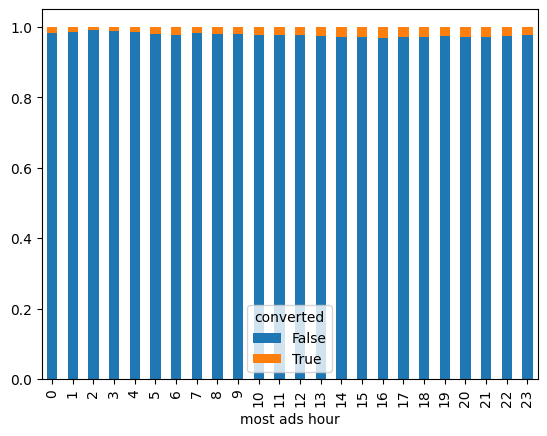

In [25]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);

ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);


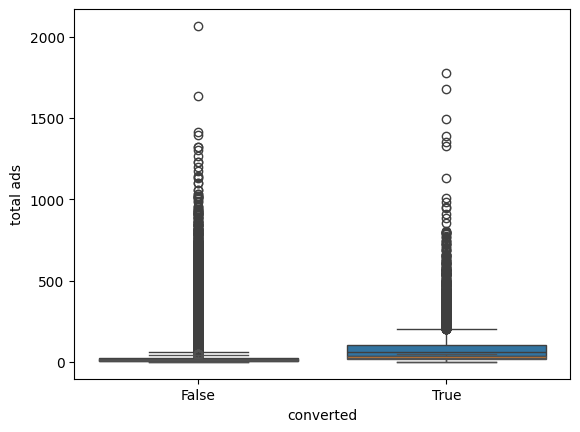

In [26]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);


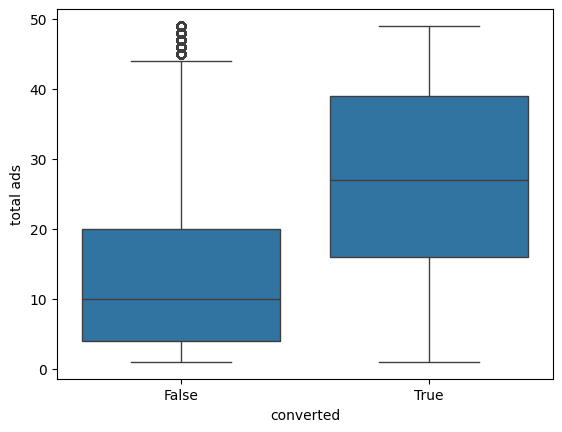

In [27]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

Statistical Tests

In [30]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    #Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[variable], df_cat['converted'])
    #Perform a chi-squared test
    chi2, p, _,_ = chi2_contingency(contingency_table)
    #Display the results
    print(f"\nChi-squared test for {variable} vs. converted:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

    #Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significat.")
    else:
      print(f"There is no significant difference in conversion rate across {variable}.")



Chi-squared test for test group vs. converted:
Chi-squared statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significat.

Chi-squared test for most ads day vs. converted:
Chi-squared statistic: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significat.

Chi-squared test for most ads hour vs. converted:
Chi-squared statistic: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significat.


In [29]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [31]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#Step 1: Check Assumption
#Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")



Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [32]:
#Step 2: Perform the appropriate test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #If assumptions are met
  t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"T-test for independent samples:")
  print(f"T-statistic: {t_stat}")
  print(f"P-value: {t_p_value}")
else:
  # Assumption not met - use Mann-Whitney U test for medians
  u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"Mann-Whitney U test for independent samples:")
  print(f"U-statistic: {u_stat}")
  print(f"P-value: {u_p_value}")

Mann-Whitney U test for independent samples:
U-statistic: 7269106736.0
P-value: 0.0
